In [1]:
import pandas as pd
import statsmodels.formula.api as sm
import numpy as np
import seaborn as sns
import scipy.stats as stats
financials = pd.read_csv("Financials.csv")
financials.datadate = pd.to_datetime(financials.datadate,format='%Y%m%d')

/opt/conda/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
financials

,gvkey,datadate,tic,AP,AT,BV,COGS,EMP,IBE,OCF,PPE,REC,SALE,XOPR,MV,2_digit_sic
0,1004,2013-05-31,AIR,149.300,2136.900,918.600,1714.500,6.300,55.000,162.900,780.900,315.400,2167.100,1921.900,790.0029,50
1,1004,2014-05-31,AIR,171.100,2199.500,999.500,1581.400,5.800,72.900,139.800,837.600,297.900,2035.000,1779.000,961.3080,50
2,1004,2015-05-31,AIR,142.300,1515.000,845.100,1342.700,4.850,-54.500,-43.000,693.500,231.100,1594.300,1510.600,1046.3954,50
3,1004,2016-05-31,AIR,163.400,1442.100,865.800,1354.900,4.700,40.500,32.100,731.200,242.700,1662.600,1525.700,842.5112,50
4,1004,2017-05-31,AIR,177.400,1504.100,914.200,1422.700,4.600,50.200,21.800,775.400,251.400,1767.600,1619.400,1200.3288,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45065,318815,2015-12-31,MTP,3.369,94.435,67.665,0.103,0.082,-14.892,-18.316,5.556,4.441,2.028,15.822,NaN,28
45066,318815,2016-12-31,MTP,4.032,69.937,55.175,0.823,0.079,-24.874,-16.144,6.856,4.061,8.541,26.822,NaN,28
45067,319507,2014-12-31,MTFB,0.022,0.226,-10.918,0.000,0.001,-1.186,-0.002,0.000,NaN,0.000,1.096,NaN,28
45068,319507,2015-12-31,MTFB,0.108,34.958,29.723,0.000,0.004,-8.517,-7.998,0.000,NaN,0.000,8.258,NaN,28


Use pd.qcut and create a new variable named Binned_EMP with 6 bins identified using integer
indicators for the bins (the first bin is 0, second bin is 1, third bin is 2, etc.). The bin ranges should be
defined based on deciles as follows: 0 to 0.1; 0.1 to 0.3; 0.3 to 0.5; 0.5 to 0.7; 0.7 to 0.9; and 0.9 to 1.
For example, rows with EMP values that are ranked very low (between the minimum and the first decile)
will have Binned_EMP equal to 0, if the EMP value is between t"he first and third third deciles then
Binned_EMP should be equal to 1, etc. (you do not need to consider how Pandas bins observations on
decile cutoffs). For full credit, use only one line of code

In [3]:
financials['Binned_EMP']=pd.qcut(financials.EMP, [0,0.1,0.3,0.5,0.7,0.9,1], labels=False)
financials

,gvkey,datadate,tic,AP,AT,BV,COGS,EMP,IBE,OCF,PPE,REC,SALE,XOPR,MV,2_digit_sic,Binned_EMP
0,1004,2013-05-31,AIR,149.300,2136.900,918.600,1714.500,6.300,55.000,162.900,780.900,315.400,2167.100,1921.900,790.0029,50,4.0
1,1004,2014-05-31,AIR,171.100,2199.500,999.500,1581.400,5.800,72.900,139.800,837.600,297.900,2035.000,1779.000,961.3080,50,4.0
2,1004,2015-05-31,AIR,142.300,1515.000,845.100,1342.700,4.850,-54.500,-43.000,693.500,231.100,1594.300,1510.600,1046.3954,50,4.0
3,1004,2016-05-31,AIR,163.400,1442.100,865.800,1354.900,4.700,40.500,32.100,731.200,242.700,1662.600,1525.700,842.5112,50,4.0
4,1004,2017-05-31,AIR,177.400,1504.100,914.200,1422.700,4.600,50.200,21.800,775.400,251.400,1767.600,1619.400,1200.3288,50,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45065,318815,2015-12-31,MTP,3.369,94.435,67.665,0.103,0.082,-14.892,-18.316,5.556,4.441,2.028,15.822,NaN,28,1.0
45066,318815,2016-12-31,MTP,4.032,69.937,55.175,0.823,0.079,-24.874,-16.144,6.856,4.061,8.541,26.822,NaN,28,1.0
45067,319507,2014-12-31,MTFB,0.022,0.226,-10.918,0.000,0.001,-1.186,-0.002,0.000,NaN,0.000,1.096,NaN,28,0.0
45068,319507,2015-12-31,MTFB,0.108,34.958,29.723,0.000,0.004,-8.517,-7.998,0.000,NaN,0.000,8.258,NaN,28,0.0


2) Use pd.qcut and Boolean Indexing to select (you can simply print the selected rows) all rows where
EMP is in deciles 0.1 to 0.4

In [4]:
financials[pd.qcut(financials.EMP, [0.1, 0.2, 0.3, 0.4], labels = False)==0]

,gvkey,datadate,tic,AP,AT,BV,COGS,EMP,IBE,OCF,PPE,REC,SALE,XOPR,MV,2_digit_sic,Binned_EMP
247,1448,2012-12-31,AXP1,2022.000,33795.000,3168.000,143.000,0.024,339.000,387.000,0.000,33090.000,1088.000,143.000,NaN,61,1.0
248,1448,2013-12-31,AXP1,1323.000,29926.000,2687.000,148.000,0.010,446.000,-251.000,0.000,29697.000,1007.000,148.000,NaN,61,1.0
249,1448,2014-12-31,AXP1,888.000,32840.000,2389.000,202.000,0.008,353.000,151.000,0.000,32320.000,929.000,202.000,NaN,61,1.0
303,1559,2012-12-31,AMS,0.263,73.323,19.929,4.153,0.010,0.038,6.871,94.901,4.107,17.048,8.198,12.5744,80,1.0
304,1559,2013-12-31,AMS,0.572,71.742,19.620,4.331,0.009,-0.312,8.076,95.180,4.665,17.584,8.241,12.7669,80,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45006,308992,2016-12-31,LEDIF,2.565,2.670,-3.888,7.364,0.028,-5.373,-2.449,0.684,0.799,10.169,14.957,4.8318,38,1.0
45012,312079,2012-12-31,DBVT,1.290,56.667,51.654,20.966,0.034,-17.026,-13.757,2.300,3.977,3.662,20.966,NaN,28,1.0
45055,318005,2015-12-31,ARGX,2.048,49.910,40.480,27.543,0.041,-16.627,-15.091,1.381,1.473,10.810,27.543,NaN,28,1.0
45063,318815,2013-12-31,MTP,0.866,8.575,1.260,0.000,0.029,-6.769,-7.352,3.053,2.718,0.244,7.292,NaN,28,1.0


Use Boolean Indexing to create a new dataframe that only contains firm years (rows) with SALE
above 20000, MV below 3000, and the year of datadate is equal to 2016 (do not add and do not assume
that a year column has been added to financials). Only include the following six columns in the new
dataframe: tic, AT, SALE, MV, EMP, and datadate. Name the new dataframe
high_sales_low_MV_companies_in_2016. For full credit only use one line of code.

In [5]:
high_sales_low_MV_companies_in_2016 = financials.loc[(financials.SALE > 20000) & (financials.datadate.dt.year == 2016) & (financials.MV < 3000), ['tic', 'AT', 'SALE', 'MV', 'EMP', 'datadate']]
high_sales_low_MV_companies_in_2016

,tic,AT,SALE,MV,EMP,datadate
2707,SHLD,11337.000,25146.000,1808.5650,178.000,2016-01-31
5752,TECD,6358.288,26379.783,2189.1792,9.000,2016-01-31
24668,SHCAY,13971.464,21896.362,1941.1578,43.511,2016-03-31


Use sns.distplot() to create a histogram of SALES with kde=False and fit=stats.norm. Use the
following code as the starting point:
sns.distplot(financials.SALE, kde=False, fit=stats.norm)
Note that this generates an error that you need to resolve. To do so, use Boolean Indexing and either
isnull() or notnull() to only keep rows with non-null values in the sales column. Do not create a separate
line of code for this, i.e., the boolean indexing should be done when you pass the data into distplot.

/tmp/ipykernel_5795/3493397862.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(financials[financials.SALE.isnull()==False].SALE, kde=False, fit=stats.norm)


<Axes: xlabel='SALE'>

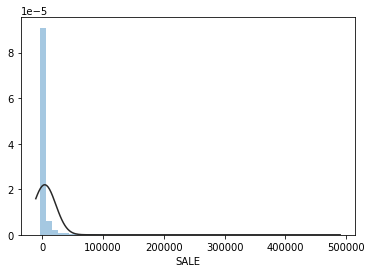

In [6]:
 sns.distplot(financials[financials.SALE.isnull()==False].SALE, kde=False, fit=stats.norm) 

Update the solution to the previous problem to also make sure that all rows have positive sales, i.e.,
SALE should be greater than 0.

/tmp/ipykernel_5795/4201222584.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(financials[(financials.SALE.isnull()==False) & (financials.SALE > 0)].SALE, kde=False, fit=stats.norm)


<Axes: xlabel='SALE'>

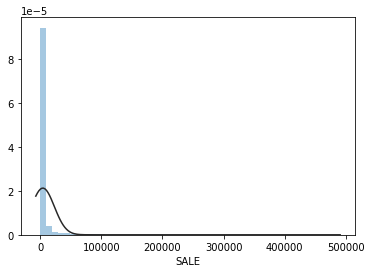

In [7]:
 sns.distplot(financials[(financials.SALE.isnull()==False) & (financials.SALE > 0)].SALE, kde=False, fit=stats.norm) 

/tmp/ipykernel_5795/3738917991.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(financials.loc[(financials.SALE.notnull()) & (financials.SALE > 0),'SALE'], kde=False,


<Axes: xlabel='SALE'>

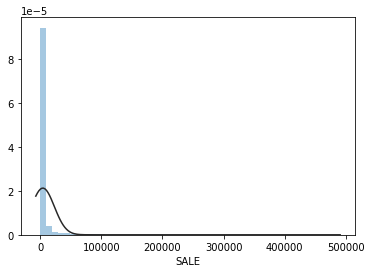

In [8]:
sns.distplot(financials.loc[(financials.SALE.notnull()) & (financials.SALE > 0),'SALE'], kde=False,
fit=stats.norm)

 Update the solution to the previous problem and instead of creating a histogram based on SALE,
create the histogram using log transformed SALE. Do not create a separate line of code for this, i.e., the
log transformation should be done when you pass the data into distplot

/tmp/ipykernel_5795/4164123357.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(financials.loc[(financials.SALE.notnull()) & (financials.SALE > 0),'SALE']), kde=False,


<Axes: xlabel='SALE'>

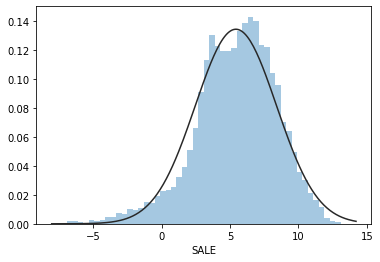

In [9]:
sns.distplot(np.log(financials.loc[(financials.SALE.notnull()) & (financials.SALE > 0),'SALE']), kde=False,
fit=stats.norm)

Update the solution to the previous problem and change the x-axis header to log(SALE)

/tmp/ipykernel_5795/1559178220.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(financials.loc[(financials.SALE.notnull()) & (financials.SALE > 0),'SALE']), axlabel = 'log(SALE)', kde=False,


<Axes: xlabel='log(SALE)'>

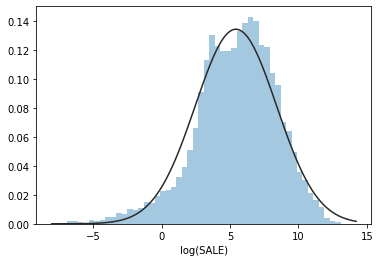

In [10]:
sns.distplot(np.log(financials.loc[(financials.SALE.notnull()) & (financials.SALE > 0),'SALE']), axlabel = 'log(SALE)', kde=False,
fit=stats.norm)

Use the solution to the previous problem and remove the historgram (do not plot the historgram)
and instead plot a gaussian kernel density estimate (continue plotting fit=stats.norm)

/tmp/ipykernel_5795/204786054.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(financials.loc[(financials.SALE.notnull()) & (financials.SALE > 0),'SALE']), axlabel = 'log(SALE)', hist = False, kde=False,


<Axes: xlabel='log(SALE)'>

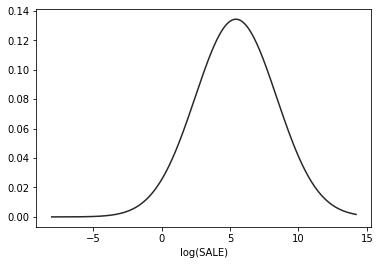

In [11]:
sns.distplot(np.log(financials.loc[(financials.SALE.notnull()) & (financials.SALE > 0),'SALE']), axlabel = 'log(SALE)', hist = False, kde=False,
fit=stats.norm)

hen create a new column named Industry_Company_Sales_Ratio that is defined as the ratio of the
average sales of a company’s industry (base this on 2_digit_sic) in a given year to the company’s sales in
the same year (i.e., average industry sales / company sales). For full credit, use one line of code to
accomplish this

In [12]:
financials['Year'] = financials.datadate.dt.year
financials['Industry_Company_Sales_Ratio'] = financials.groupby(['2_digit_sic','Year'])['SALE'].transform("mean")/financials.SALE
financials

,gvkey,datadate,tic,AP,AT,BV,COGS,EMP,IBE,OCF,PPE,REC,SALE,XOPR,MV,2_digit_sic,Binned_EMP,Year,Industry_Company_Sales_Ratio
0,1004,2013-05-31,AIR,149.300,2136.900,918.600,1714.500,6.300,55.000,162.900,780.900,315.400,2167.100,1921.900,790.0029,50,4.0,2013,1.878851
1,1004,2014-05-31,AIR,171.100,2199.500,999.500,1581.400,5.800,72.900,139.800,837.600,297.900,2035.000,1779.000,961.3080,50,4.0,2014,2.090935
2,1004,2015-05-31,AIR,142.300,1515.000,845.100,1342.700,4.850,-54.500,-43.000,693.500,231.100,1594.300,1510.600,1046.3954,50,4.0,2015,2.643093
3,1004,2016-05-31,AIR,163.400,1442.100,865.800,1354.900,4.700,40.500,32.100,731.200,242.700,1662.600,1525.700,842.5112,50,4.0,2016,2.556836
4,1004,2017-05-31,AIR,177.400,1504.100,914.200,1422.700,4.600,50.200,21.800,775.400,251.400,1767.600,1619.400,1200.3288,50,4.0,2017,3.466397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45065,318815,2015-12-31,MTP,3.369,94.435,67.665,0.103,0.082,-14.892,-18.316,5.556,4.441,2.028,15.822,NaN,28,1.0,2015,850.583982
45066,318815,2016-12-31,MTP,4.032,69.937,55.175,0.823,0.079,-24.874,-16.144,6.856,4.061,8.541,26.822,NaN,28,1.0,2016,203.188129
45067,319507,2014-12-31,MTFB,0.022,0.226,-10.918,0.000,0.001,-1.186,-0.002,0.000,NaN,0.000,1.096,NaN,28,0.0,2014,inf
45068,319507,2015-12-31,MTFB,0.108,34.958,29.723,0.000,0.004,-8.517,-7.998,0.000,NaN,0.000,8.258,NaN,28,0.0,2015,inf


Use Boolean Indexing to print all columns for all observations where the Industry_Company_Sales_Ratio is equal to or greater than 1

In [13]:
financials.loc[financials.Industry_Company_Sales_Ratio  >= 1]

,gvkey,datadate,tic,AP,AT,BV,COGS,EMP,IBE,OCF,PPE,REC,SALE,XOPR,MV,2_digit_sic,Binned_EMP,Year,Industry_Company_Sales_Ratio
0,1004,2013-05-31,AIR,149.300,2136.900,918.600,1714.500,6.300,55.000,162.900,780.900,315.400,2167.100,1921.900,790.0029,50,4.0,2013,1.878851
1,1004,2014-05-31,AIR,171.100,2199.500,999.500,1581.400,5.800,72.900,139.800,837.600,297.900,2035.000,1779.000,961.3080,50,4.0,2014,2.090935
2,1004,2015-05-31,AIR,142.300,1515.000,845.100,1342.700,4.850,-54.500,-43.000,693.500,231.100,1594.300,1510.600,1046.3954,50,4.0,2015,2.643093
3,1004,2016-05-31,AIR,163.400,1442.100,865.800,1354.900,4.700,40.500,32.100,731.200,242.700,1662.600,1525.700,842.5112,50,4.0,2016,2.556836
4,1004,2017-05-31,AIR,177.400,1504.100,914.200,1422.700,4.600,50.200,21.800,775.400,251.400,1767.600,1619.400,1200.3288,50,4.0,2017,3.466397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45065,318815,2015-12-31,MTP,3.369,94.435,67.665,0.103,0.082,-14.892,-18.316,5.556,4.441,2.028,15.822,NaN,28,1.0,2015,850.583982
45066,318815,2016-12-31,MTP,4.032,69.937,55.175,0.823,0.079,-24.874,-16.144,6.856,4.061,8.541,26.822,NaN,28,1.0,2016,203.188129
45067,319507,2014-12-31,MTFB,0.022,0.226,-10.918,0.000,0.001,-1.186,-0.002,0.000,NaN,0.000,1.096,NaN,28,0.0,2014,inf
45068,319507,2015-12-31,MTFB,0.108,34.958,29.723,0.000,0.004,-8.517,-7.998,0.000,NaN,0.000,8.258,NaN,28,0.0,2015,inf


Reperform 6, but do not use the Industry_Company_Sales_Ratio column (instead embed parts of the
solution in 5 within the solution for 6)

In [14]:
financials.loc[financials.groupby(['2_digit_sic','Year'])['SALE'].transform("mean")/financials.SALE>= 1]

,gvkey,datadate,tic,AP,AT,BV,COGS,EMP,IBE,OCF,PPE,REC,SALE,XOPR,MV,2_digit_sic,Binned_EMP,Year,Industry_Company_Sales_Ratio
0,1004,2013-05-31,AIR,149.300,2136.900,918.600,1714.500,6.300,55.000,162.900,780.900,315.400,2167.100,1921.900,790.0029,50,4.0,2013,1.878851
1,1004,2014-05-31,AIR,171.100,2199.500,999.500,1581.400,5.800,72.900,139.800,837.600,297.900,2035.000,1779.000,961.3080,50,4.0,2014,2.090935
2,1004,2015-05-31,AIR,142.300,1515.000,845.100,1342.700,4.850,-54.500,-43.000,693.500,231.100,1594.300,1510.600,1046.3954,50,4.0,2015,2.643093
3,1004,2016-05-31,AIR,163.400,1442.100,865.800,1354.900,4.700,40.500,32.100,731.200,242.700,1662.600,1525.700,842.5112,50,4.0,2016,2.556836
4,1004,2017-05-31,AIR,177.400,1504.100,914.200,1422.700,4.600,50.200,21.800,775.400,251.400,1767.600,1619.400,1200.3288,50,4.0,2017,3.466397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45065,318815,2015-12-31,MTP,3.369,94.435,67.665,0.103,0.082,-14.892,-18.316,5.556,4.441,2.028,15.822,NaN,28,1.0,2015,850.583982
45066,318815,2016-12-31,MTP,4.032,69.937,55.175,0.823,0.079,-24.874,-16.144,6.856,4.061,8.541,26.822,NaN,28,1.0,2016,203.188129
45067,319507,2014-12-31,MTFB,0.022,0.226,-10.918,0.000,0.001,-1.186,-0.002,0.000,NaN,0.000,1.096,NaN,28,0.0,2014,inf
45068,319507,2015-12-31,MTFB,0.108,34.958,29.723,0.000,0.004,-8.517,-7.998,0.000,NaN,0.000,8.258,NaN,28,0.0,2015,inf


Create a new column named Industry_Leader_Company_Ratio that is defined as the ratio of the
highest sales of a company in a company’s industry in a given year to the company’s sales in the same
year (highest industry sales / company sales). For full credit, use one line of code to accomplish this.

In [15]:
financials['Industry_Leader_Company_Ratio'] = financials.groupby(['2_digit_sic','Year'])['SALE'].transform("max")/financials.SALE
financials

,gvkey,datadate,tic,AP,AT,BV,COGS,EMP,IBE,OCF,PPE,REC,SALE,XOPR,MV,2_digit_sic,Binned_EMP,Year,Industry_Company_Sales_Ratio,Industry_Leader_Company_Ratio
0,1004,2013-05-31,AIR,149.300,2136.900,918.600,1714.500,6.300,55.000,162.900,780.900,315.400,2167.100,1921.900,790.0029,50,4.0,2013,1.878851,2.407013e+01
1,1004,2014-05-31,AIR,171.100,2199.500,999.500,1581.400,5.800,72.900,139.800,837.600,297.900,2035.000,1779.000,961.3080,50,4.0,2014,2.090935,2.735160e+01
2,1004,2015-05-31,AIR,142.300,1515.000,845.100,1342.700,4.850,-54.500,-43.000,693.500,231.100,1594.300,1510.600,1046.3954,50,4.0,2015,2.643093,2.826074e+01
3,1004,2016-05-31,AIR,163.400,1442.100,865.800,1354.900,4.700,40.500,32.100,731.200,242.700,1662.600,1525.700,842.5112,50,4.0,2016,2.556836,2.546523e+01
4,1004,2017-05-31,AIR,177.400,1504.100,914.200,1422.700,4.600,50.200,21.800,775.400,251.400,1767.600,1619.400,1200.3288,50,4.0,2017,3.466397,2.216019e+01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45065,318815,2015-12-31,MTP,3.369,94.435,67.665,0.103,0.082,-14.892,-18.316,5.556,4.441,2.028,15.822,NaN,28,1.0,2015,850.583982,3.821158e+04
45066,318815,2016-12-31,MTP,4.032,69.937,55.175,0.823,0.079,-24.874,-16.144,6.856,4.061,8.541,26.822,NaN,28,1.0,2016,203.188129,8.417047e+03
45067,319507,2014-12-31,MTFB,0.022,0.226,-10.918,0.000,0.001,-1.186,-0.002,0.000,NaN,0.000,1.096,NaN,28,0.0,2014,inf,inf
45068,319507,2015-12-31,MTFB,0.108,34.958,29.723,0.000,0.004,-8.517,-7.998,0.000,NaN,0.000,8.258,NaN,28,0.0,2015,inf,inf


## 5.a. Pandas (and StatsModels) Example - Abnormal Sales (Questions, Solutions, and Comments).docx

In [16]:
import pandas as pd
import statsmodels.formula.api as sm
import numpy as np

In [17]:
financials = pd.read_csv("Financials.csv")

In [18]:
financials.head(20)

,gvkey,datadate,tic,AP,AT,BV,COGS,EMP,IBE,OCF,PPE,REC,SALE,XOPR,MV,2_digit_sic
0,1004,20130531,AIR,149.300,2136.900,918.600,1714.500,6.300,55.000,162.900,780.900,315.400,2167.100,1921.900,790.0029,50
1,1004,20140531,AIR,171.100,2199.500,999.500,1581.400,5.800,72.900,139.800,837.600,297.900,2035.000,1779.000,961.3080,50
2,1004,20150531,AIR,142.300,1515.000,845.100,1342.700,4.850,-54.500,-43.000,693.500,231.100,1594.300,1510.600,1046.3954,50
3,1004,20160531,AIR,163.400,1442.100,865.800,1354.900,4.700,40.500,32.100,731.200,242.700,1662.600,1525.700,842.5112,50
4,1004,20170531,AIR,177.400,1504.100,914.200,1422.700,4.600,50.200,21.800,775.400,251.400,1767.600,1619.400,1200.3288,50
5,1045,20121231,AAL,1244.000,23510.000,-7987.000,20529.000,77.750,-1876.000,1279.000,24233.000,1124.000,24855.000,23421.000,266.5571,45
6,1045,20131231,AAL,1368.000,42278.000,-2731.000,19084.000,110.400,-1834.000,675.000,30392.000,1560.000,26712.000,23756.000,6591.9923,45
7,1045,20141231,AAL,1377.000,43771.000,2021.000,29511.000,113.300,2882.000,3080.000,35343.000,1771.000,42650.000,36065.000,37405.5843,45
8,1045,20151231,AAL,1563.000,48415.000,5635.000,25416.000,118.500,7610.000,6249.000,40654.000,1425.000,40990.000,32099.000,26452.7417,45
9,1045,20161231,AAL,1592.000,51274.000,3785.000,25695.000,122.300,2676.000,6524.000,45353.000,1594.000,40180.000,32347.000,23685.5569,45


### 5

In [19]:
financials.isnull()

,gvkey,datadate,tic,AP,AT,BV,COGS,EMP,IBE,OCF,PPE,REC,SALE,XOPR,MV,2_digit_sic
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45065,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
45066,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
45067,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False
45068,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False


In [20]:
print(financials.isnull().sum(axis=1))

0        0
1        0
2        0
3        0
4        0
        ..
45065    1
45066    1
45067    2
45068    2
45069    2
Length: 45070, dtype: int64


In [21]:
financials['NumNulls'] = financials.isnull().sum(axis=1)
financials

,gvkey,datadate,tic,AP,AT,BV,COGS,EMP,IBE,OCF,PPE,REC,SALE,XOPR,MV,2_digit_sic,NumNulls
0,1004,20130531,AIR,149.300,2136.900,918.600,1714.500,6.300,55.000,162.900,780.900,315.400,2167.100,1921.900,790.0029,50,0
1,1004,20140531,AIR,171.100,2199.500,999.500,1581.400,5.800,72.900,139.800,837.600,297.900,2035.000,1779.000,961.3080,50,0
2,1004,20150531,AIR,142.300,1515.000,845.100,1342.700,4.850,-54.500,-43.000,693.500,231.100,1594.300,1510.600,1046.3954,50,0
3,1004,20160531,AIR,163.400,1442.100,865.800,1354.900,4.700,40.500,32.100,731.200,242.700,1662.600,1525.700,842.5112,50,0
4,1004,20170531,AIR,177.400,1504.100,914.200,1422.700,4.600,50.200,21.800,775.400,251.400,1767.600,1619.400,1200.3288,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45065,318815,20151231,MTP,3.369,94.435,67.665,0.103,0.082,-14.892,-18.316,5.556,4.441,2.028,15.822,NaN,28,1
45066,318815,20161231,MTP,4.032,69.937,55.175,0.823,0.079,-24.874,-16.144,6.856,4.061,8.541,26.822,NaN,28,1
45067,319507,20141231,MTFB,0.022,0.226,-10.918,0.000,0.001,-1.186,-0.002,0.000,NaN,0.000,1.096,NaN,28,2
45068,319507,20151231,MTFB,0.108,34.958,29.723,0.000,0.004,-8.517,-7.998,0.000,NaN,0.000,8.258,NaN,28,2


In [22]:
financials.sort_values('NumNulls', ascending=False)

,gvkey,datadate,tic,AP,AT,BV,COGS,EMP,IBE,OCF,PPE,REC,SALE,XOPR,MV,2_digit_sic,NumNulls
36540,177391,20141231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67,13
35569,176324,20141231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67,13
35567,176324,20121231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67,13
37047,178034,20141231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67,13
37045,178034,20121231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20154,30170,20140331,FLEX,4747.779,12500.150,2163.050,24194.099,150.000,365.594,1216.460,5113.077,3168.893,26108.607,25068.895,5464.7855,36,0
20153,30170,20130331,FLEX,3705.297,10591.555,2246.758,21775.125,149.000,302.502,1115.430,4751.751,2524.353,23569.475,22580.360,4319.0992,36,0
20151,30146,20161231,ITG,126.934,775.285,405.164,418.566,0.956,-25.918,35.082,210.210,207.653,466.593,418.566,644.0372,62,0
20149,30146,20151231,ITG,988.333,1709.022,454.821,442.399,1.037,91.570,48.746,201.112,1086.081,527.104,442.399,563.2429,62,0


In [23]:
financials.head(20)

,gvkey,datadate,tic,AP,AT,BV,COGS,EMP,IBE,OCF,PPE,REC,SALE,XOPR,MV,2_digit_sic,NumNulls
0,1004,20130531,AIR,149.300,2136.900,918.600,1714.500,6.300,55.000,162.900,780.900,315.400,2167.100,1921.900,790.0029,50,0
1,1004,20140531,AIR,171.100,2199.500,999.500,1581.400,5.800,72.900,139.800,837.600,297.900,2035.000,1779.000,961.3080,50,0
2,1004,20150531,AIR,142.300,1515.000,845.100,1342.700,4.850,-54.500,-43.000,693.500,231.100,1594.300,1510.600,1046.3954,50,0
3,1004,20160531,AIR,163.400,1442.100,865.800,1354.900,4.700,40.500,32.100,731.200,242.700,1662.600,1525.700,842.5112,50,0
4,1004,20170531,AIR,177.400,1504.100,914.200,1422.700,4.600,50.200,21.800,775.400,251.400,1767.600,1619.400,1200.3288,50,0
5,1045,20121231,AAL,1244.000,23510.000,-7987.000,20529.000,77.750,-1876.000,1279.000,24233.000,1124.000,24855.000,23421.000,266.5571,45,0
6,1045,20131231,AAL,1368.000,42278.000,-2731.000,19084.000,110.400,-1834.000,675.000,30392.000,1560.000,26712.000,23756.000,6591.9923,45,0
7,1045,20141231,AAL,1377.000,43771.000,2021.000,29511.000,113.300,2882.000,3080.000,35343.000,1771.000,42650.000,36065.000,37405.5843,45,0
8,1045,20151231,AAL,1563.000,48415.000,5635.000,25416.000,118.500,7610.000,6249.000,40654.000,1425.000,40990.000,32099.000,26452.7417,45,0
9,1045,20161231,AAL,1592.000,51274.000,3785.000,25695.000,122.300,2676.000,6524.000,45353.000,1594.000,40180.000,32347.000,23685.5569,45,0


#### 6 

In [24]:
#  Handle missing values -  Delete columns IBE, OCF, and PPE
financials = financials.drop(['IBE','OCF','PPE'], axis=1)
financials

,gvkey,datadate,tic,AP,AT,BV,COGS,EMP,REC,SALE,XOPR,MV,2_digit_sic,NumNulls
0,1004,20130531,AIR,149.300,2136.900,918.600,1714.500,6.300,315.400,2167.100,1921.900,790.0029,50,0
1,1004,20140531,AIR,171.100,2199.500,999.500,1581.400,5.800,297.900,2035.000,1779.000,961.3080,50,0
2,1004,20150531,AIR,142.300,1515.000,845.100,1342.700,4.850,231.100,1594.300,1510.600,1046.3954,50,0
3,1004,20160531,AIR,163.400,1442.100,865.800,1354.900,4.700,242.700,1662.600,1525.700,842.5112,50,0
4,1004,20170531,AIR,177.400,1504.100,914.200,1422.700,4.600,251.400,1767.600,1619.400,1200.3288,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45065,318815,20151231,MTP,3.369,94.435,67.665,0.103,0.082,4.441,2.028,15.822,NaN,28,1
45066,318815,20161231,MTP,4.032,69.937,55.175,0.823,0.079,4.061,8.541,26.822,NaN,28,1
45067,319507,20141231,MTFB,0.022,0.226,-10.918,0.000,0.001,NaN,0.000,1.096,NaN,28,2
45068,319507,20151231,MTFB,0.108,34.958,29.723,0.000,0.004,NaN,0.000,8.258,NaN,28,2


In [25]:
# b. Delete rows that have missing values in sales (this is the dependent variable).
financials = financials.dropna(subset = ['SALE'])
financials

,gvkey,datadate,tic,AP,AT,BV,COGS,EMP,REC,SALE,XOPR,MV,2_digit_sic,NumNulls
0,1004,20130531,AIR,149.300,2136.900,918.600,1714.500,6.300,315.400,2167.100,1921.900,790.0029,50,0
1,1004,20140531,AIR,171.100,2199.500,999.500,1581.400,5.800,297.900,2035.000,1779.000,961.3080,50,0
2,1004,20150531,AIR,142.300,1515.000,845.100,1342.700,4.850,231.100,1594.300,1510.600,1046.3954,50,0
3,1004,20160531,AIR,163.400,1442.100,865.800,1354.900,4.700,242.700,1662.600,1525.700,842.5112,50,0
4,1004,20170531,AIR,177.400,1504.100,914.200,1422.700,4.600,251.400,1767.600,1619.400,1200.3288,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45065,318815,20151231,MTP,3.369,94.435,67.665,0.103,0.082,4.441,2.028,15.822,NaN,28,1
45066,318815,20161231,MTP,4.032,69.937,55.175,0.823,0.079,4.061,8.541,26.822,NaN,28,1
45067,319507,20141231,MTFB,0.022,0.226,-10.918,0.000,0.001,NaN,0.000,1.096,NaN,28,2
45068,319507,20151231,MTFB,0.108,34.958,29.723,0.000,0.004,NaN,0.000,8.258,NaN,28,2


c. Delete all rows with missing values in more than 3 columns.

In [26]:
financials = financials.dropna(thresh = 11)
financials

,gvkey,datadate,tic,AP,AT,BV,COGS,EMP,REC,SALE,XOPR,MV,2_digit_sic,NumNulls
0,1004,20130531,AIR,149.300,2136.900,918.600,1714.500,6.300,315.400,2167.100,1921.900,790.0029,50,0
1,1004,20140531,AIR,171.100,2199.500,999.500,1581.400,5.800,297.900,2035.000,1779.000,961.3080,50,0
2,1004,20150531,AIR,142.300,1515.000,845.100,1342.700,4.850,231.100,1594.300,1510.600,1046.3954,50,0
3,1004,20160531,AIR,163.400,1442.100,865.800,1354.900,4.700,242.700,1662.600,1525.700,842.5112,50,0
4,1004,20170531,AIR,177.400,1504.100,914.200,1422.700,4.600,251.400,1767.600,1619.400,1200.3288,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45065,318815,20151231,MTP,3.369,94.435,67.665,0.103,0.082,4.441,2.028,15.822,NaN,28,1
45066,318815,20161231,MTP,4.032,69.937,55.175,0.823,0.079,4.061,8.541,26.822,NaN,28,1
45067,319507,20141231,MTFB,0.022,0.226,-10.918,0.000,0.001,NaN,0.000,1.096,NaN,28,2
45068,319507,20151231,MTFB,0.108,34.958,29.723,0.000,0.004,NaN,0.000,8.258,NaN,28,2


d. Replace missing values in AP, REC, and BV with column means.

In [27]:
#financials = financials.AP.fillna(financials.AP.mean())
#financials = financials.REC.fillna(financials.REC.mean())
#financials = financials.BV.fillna(financials.BV.mean())

e. Replace missing value in MV with industry means (industry is defined based on 2_digit_sic).

In [28]:
# financials.MV.fillna(financials.groupby('2_digit_sic')['M'].transform("mean"), inplace=True)